In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

C:\Users\adamt\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\adamt\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\adamt\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# get the data for a specific ticker and date range
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start = start_date, end = end_date)
    return stock_data

# split the data into training and testing
def train_test_split(data, percent_train, timesteps):
    train_size = int(len(data) * percent_train)
    train_data = data[:train_size]
    test_data = data[train_size - timesteps:]
    return train_data, test_data

# create sequences for the training data
def create_sequences_train(sequence_length, data):
    X = []
    y = []
    
    for i in range(sequence_length, len(data)):
        X.append(data[i - sequence_length:i, :])
        y.append(data[i, 0])
    
    return np.array(X), np.array(y)

# create sequences of data that will be used for the testing set
def create_sequences_test(sequence_length, data):
    X = []
    
    for i in range(sequence_length, len(data)):
        X.append(data[i - sequence_length:i, :])
    
    return np.array(X)

# reshape the X data to the right shape for the model
def reshape_data(data, num_features):
    return np.reshape(data, (data.shape[0], data.shape[1], num_features))

def plot_data(validate_data, stock):
    # visualize 
    plt.figure(figsize = (16, 8))
    plt.title('Model')
    plt.xlabel('Date', fontsize = 18)
    plt.ylabel('Close Price USD ($)', fontsize = 18)
    plt.plot(validate_data[stock])
    plt.plot(validate_data['Predictions'])
    plt.legend(['Val', 'Predictions'], loc = 'lower right')
    plt.show()
    
def directional_accuracy(validate_data, stock):
    correct = 0
    for i in range(len(validate_data) - 1):
        predicted_direction = validate_data['Predictions'][i + 1] - validate_data['Predictions'][i]
        actual_direction = validate_data[stock][i + 1] - validate_data[stock][i]

        if np.sign(predicted_direction) == np.sign(actual_direction):
            correct += 1

    accuracy = correct / (len(validate_data) - 1)  
    
    return accuracy

[*********************100%***********************]  1 of 1 completed
C:\Users\adamt\AppData\Local\Temp/ipykernel_19756/109004421.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validate_data['Predictions'] = y_pred


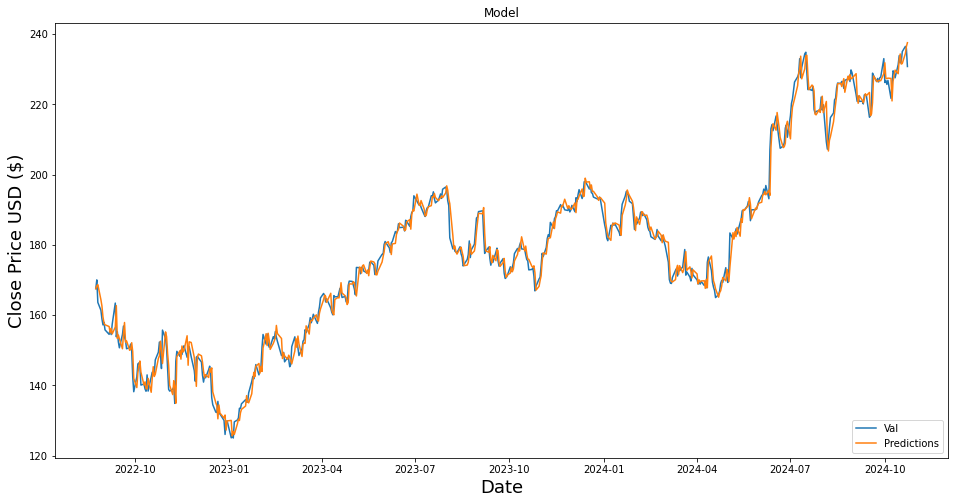

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

AAPL Directional Accuracy:  0.5275735294117647
AAPL RMSE:  0.006319552161566377


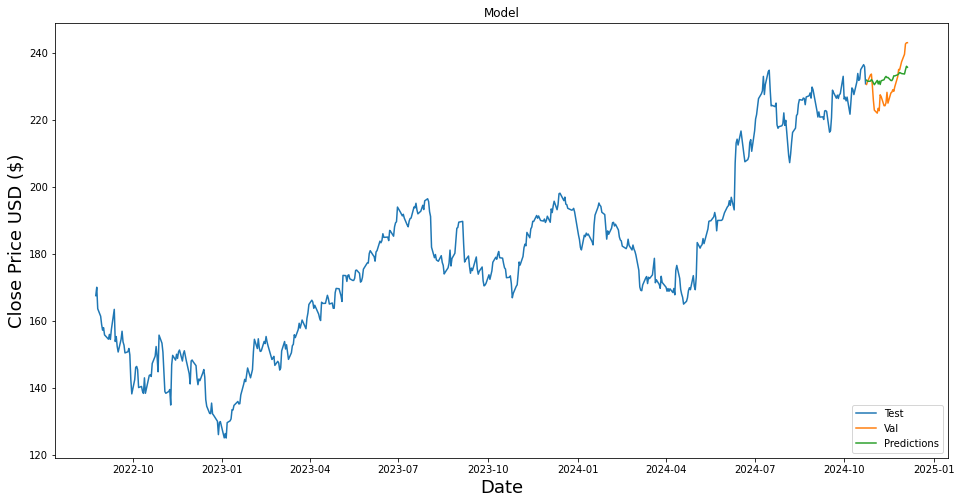

[*********************100%***********************]  1 of 1 completed

AAPL Directional Accuracy:  0.3793103448275862



C:\Users\adamt\AppData\Local\Temp/ipykernel_19756/109004421.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validate_data['Predictions'] = y_pred


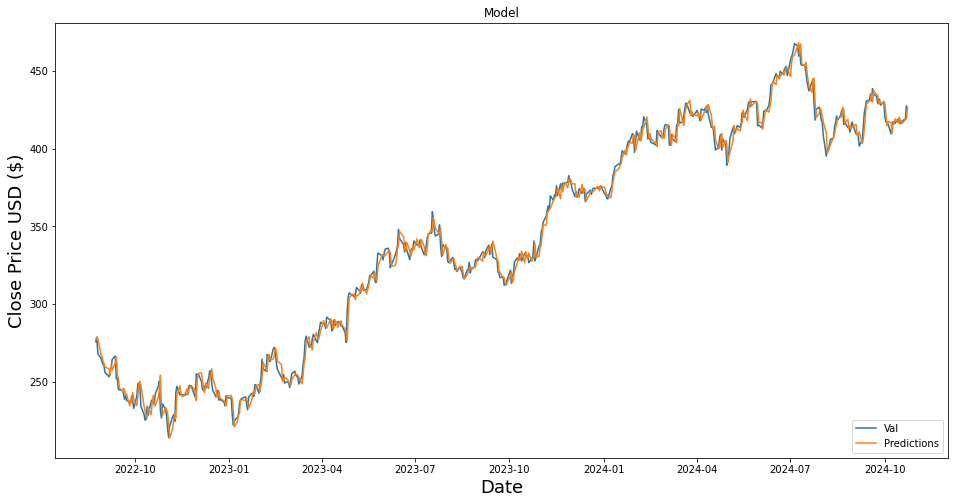

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

MSFT Directional Accuracy:  0.5147058823529411
MSFT RMSE:  0.15995318770357284


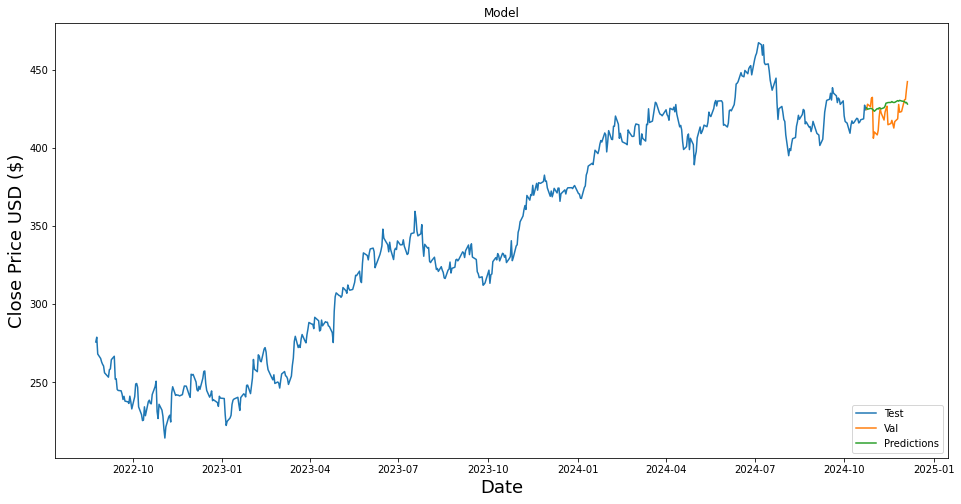

[*********************100%***********************]  1 of 1 completed

MSFT Directional Accuracy:  0.4482758620689655



C:\Users\adamt\AppData\Local\Temp/ipykernel_19756/109004421.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validate_data['Predictions'] = y_pred


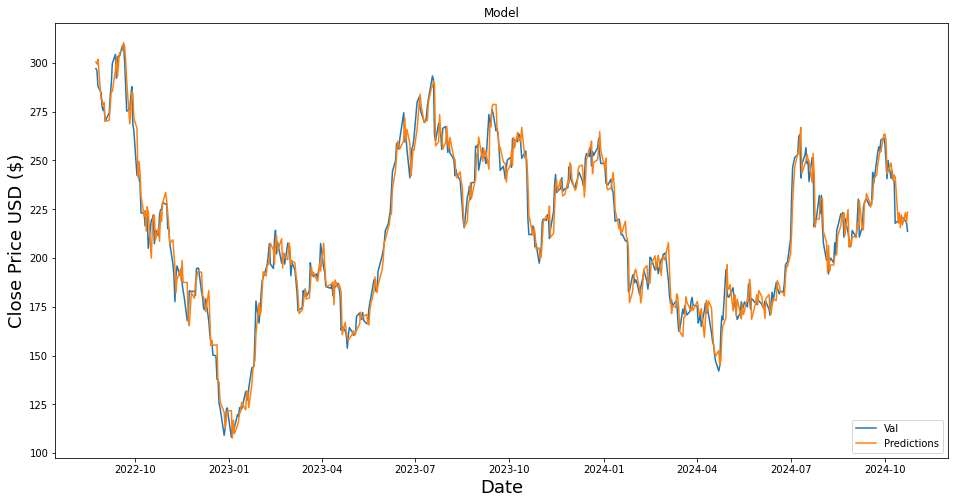

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

TSLA Directional Accuracy:  0.5275735294117647
TSLA RMSE:  0.35454574448198506


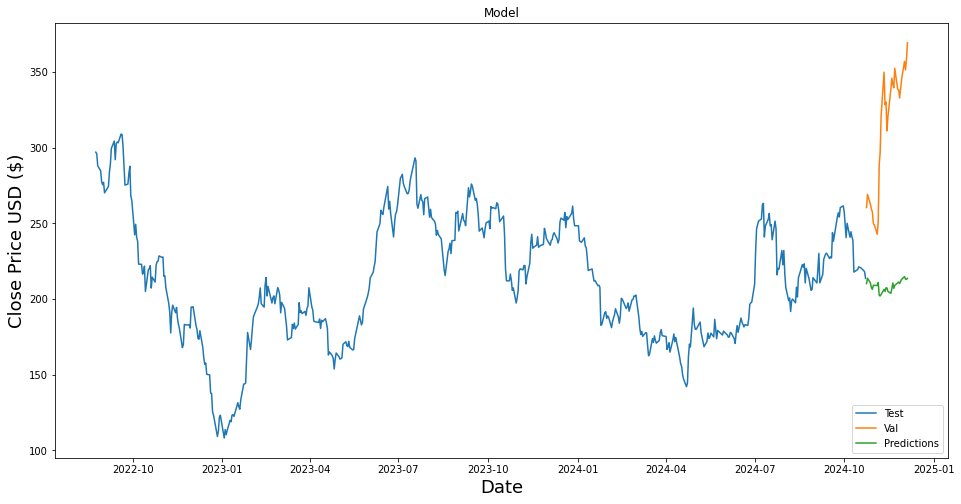

[*********************100%***********************]  1 of 1 completed

TSLA Directional Accuracy:  0.6896551724137931



C:\Users\adamt\AppData\Local\Temp/ipykernel_19756/109004421.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validate_data['Predictions'] = y_pred


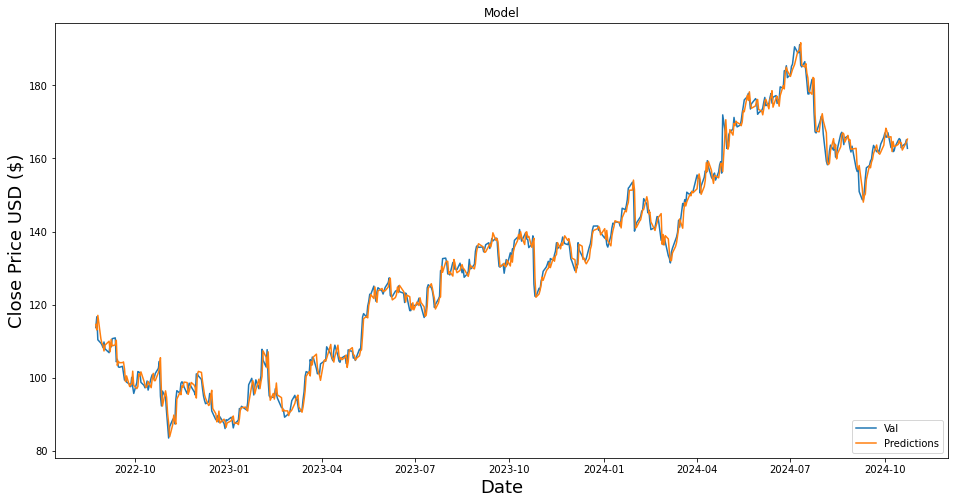

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

GOOGL Directional Accuracy:  0.5275735294117647
GOOGL RMSE:  0.07460498061050108


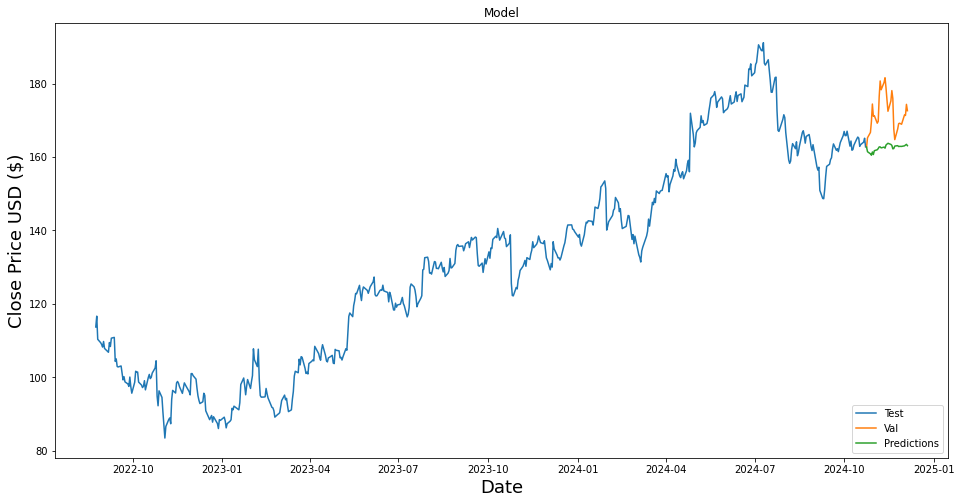

[*********************100%***********************]  1 of 1 completed

GOOGL Directional Accuracy:  0.4827586206896552



C:\Users\adamt\AppData\Local\Temp/ipykernel_19756/109004421.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validate_data['Predictions'] = y_pred


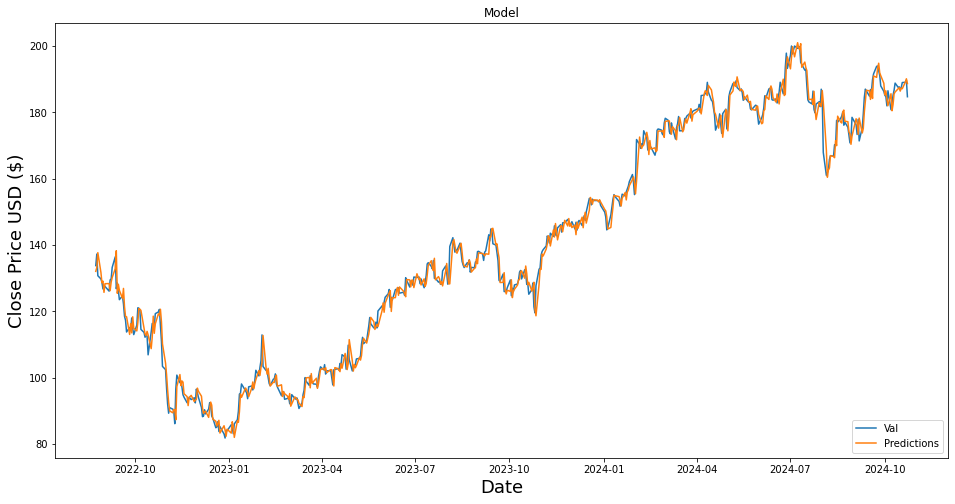

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

AMZN Directional Accuracy:  0.4944852941176471
AMZN RMSE:  0.0926768677134008


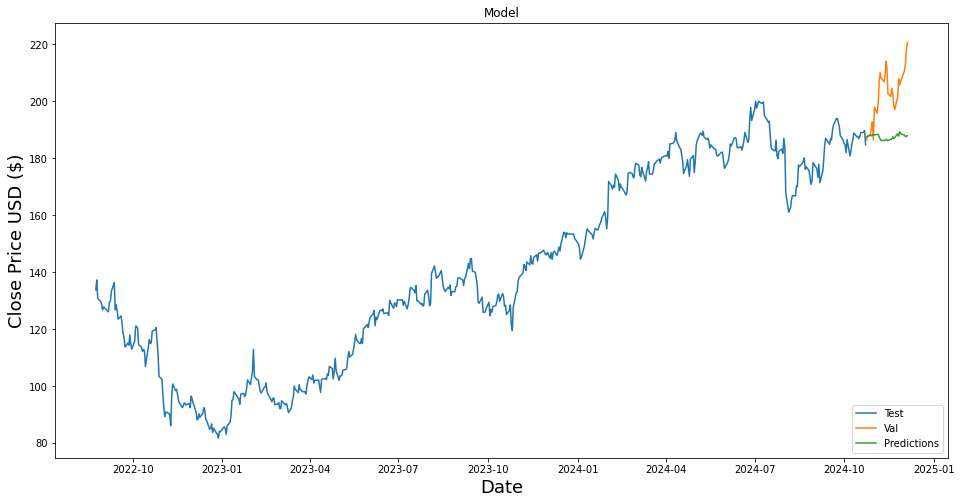

[*********************100%***********************]  1 of 1 completed

AMZN Directional Accuracy:  0.5172413793103449



C:\Users\adamt\AppData\Local\Temp/ipykernel_19756/109004421.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validate_data['Predictions'] = y_pred


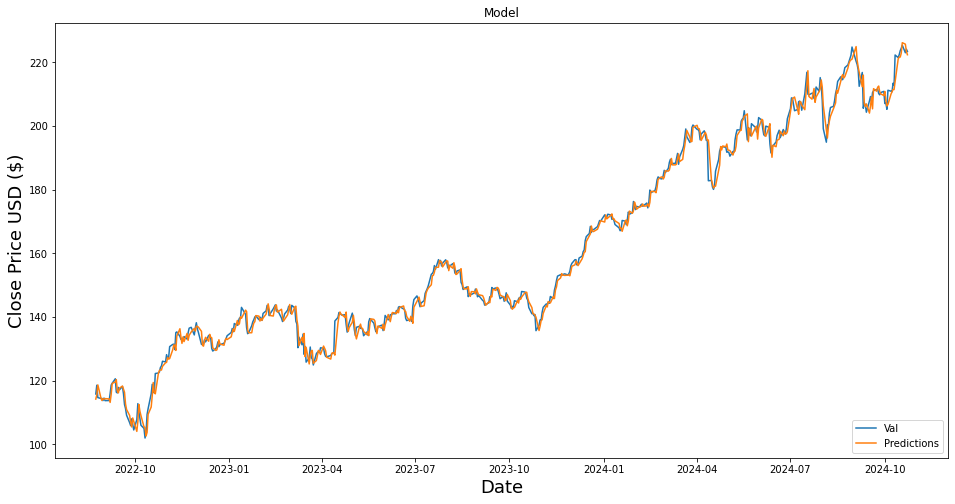

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

JPM Directional Accuracy:  0.5404411764705882
JPM RMSE:  0.2652232657314397


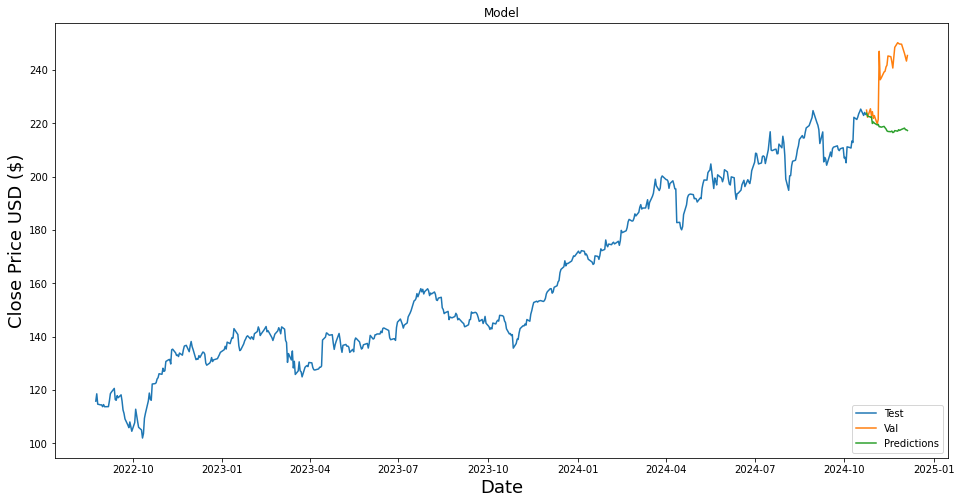

[*********************100%***********************]  1 of 1 completed

JPM Directional Accuracy:  0.3793103448275862



C:\Users\adamt\AppData\Local\Temp/ipykernel_19756/109004421.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validate_data['Predictions'] = y_pred


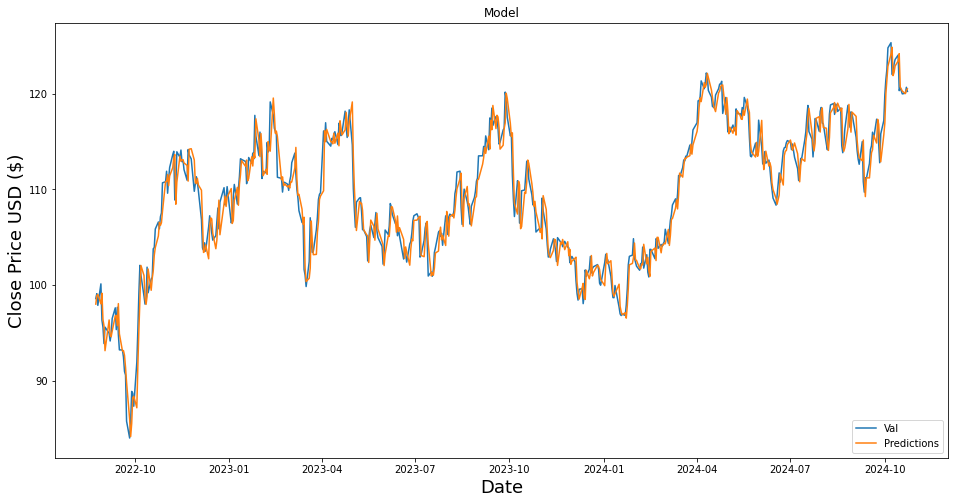

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

XOM Directional Accuracy:  0.5091911764705882
XOM RMSE:  0.11963794348071813


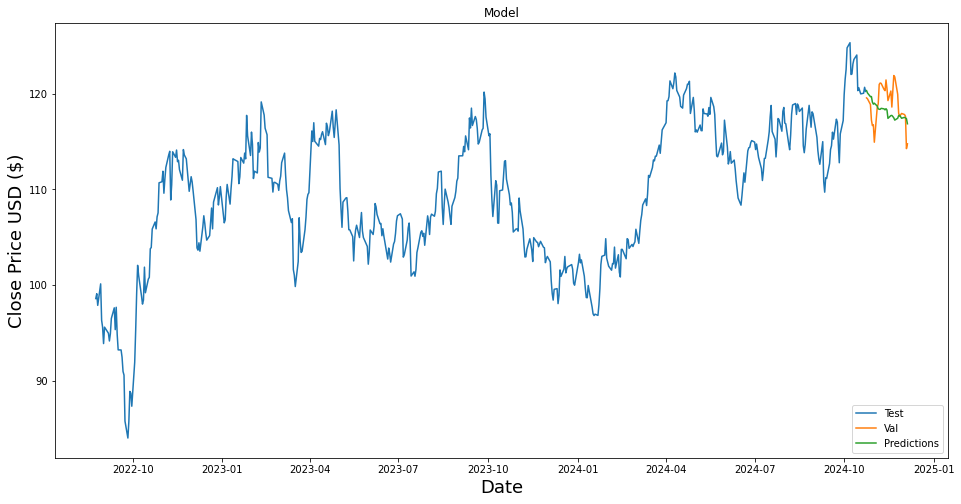

[*********************100%***********************]  1 of 1 completed

XOM Directional Accuracy:  0.41379310344827586



C:\Users\adamt\AppData\Local\Temp/ipykernel_19756/109004421.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validate_data['Predictions'] = y_pred


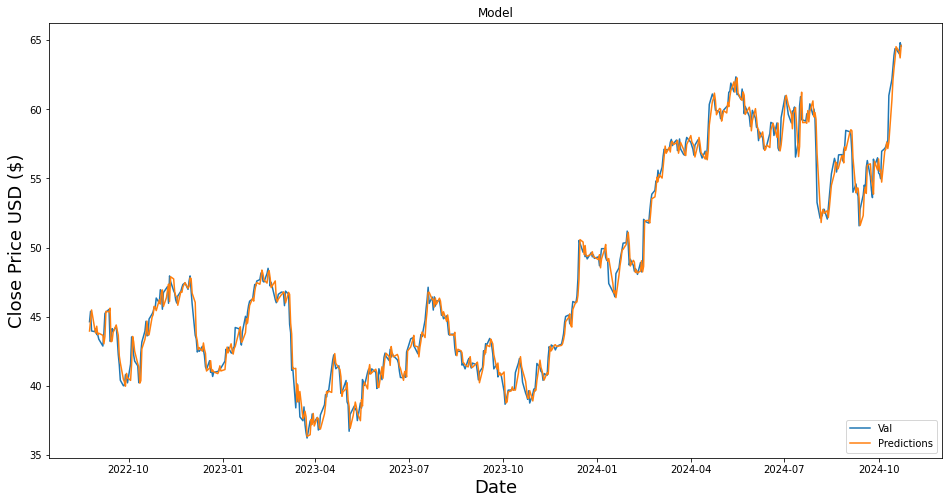

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

WFC Directional Accuracy:  0.5128676470588235
WFC RMSE:  0.03218471594491988


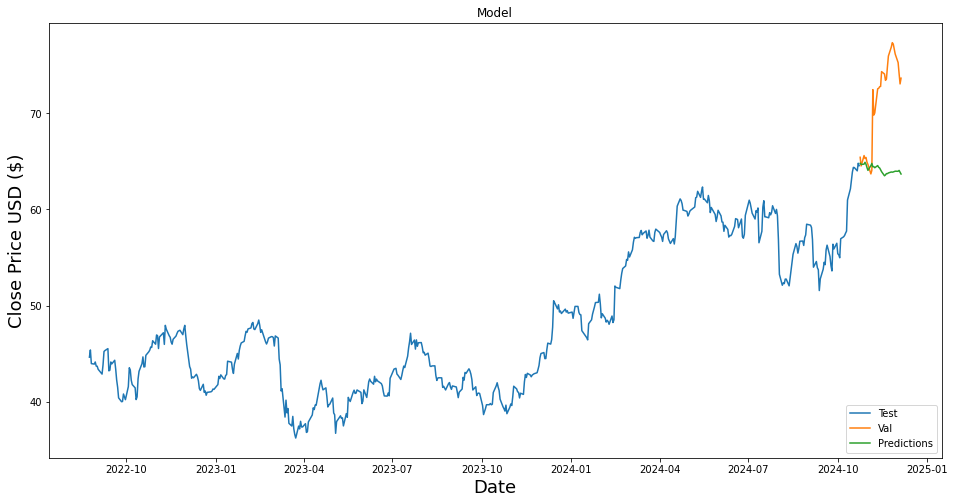

[*********************100%***********************]  1 of 1 completed

WFC Directional Accuracy:  0.41379310344827586



C:\Users\adamt\AppData\Local\Temp/ipykernel_19756/109004421.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validate_data['Predictions'] = y_pred


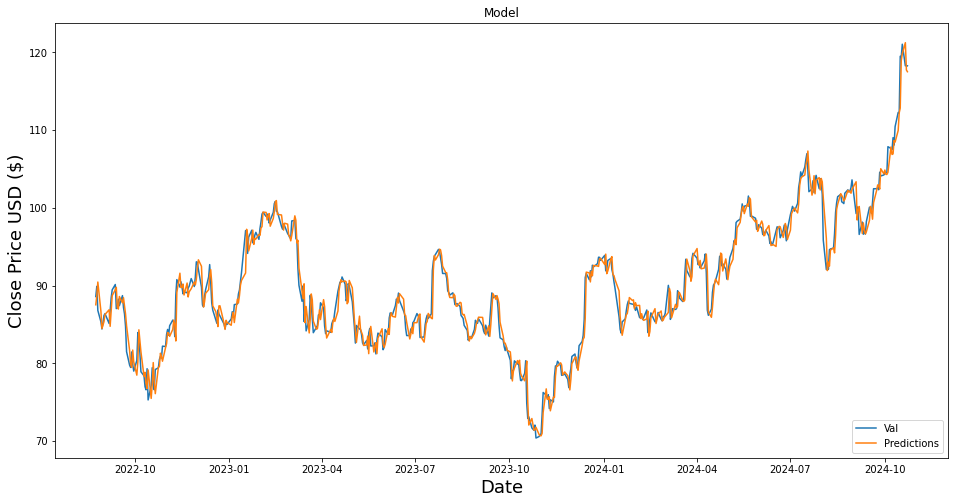

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

MS Directional Accuracy:  0.5477941176470589
MS RMSE:  0.05384818066677368


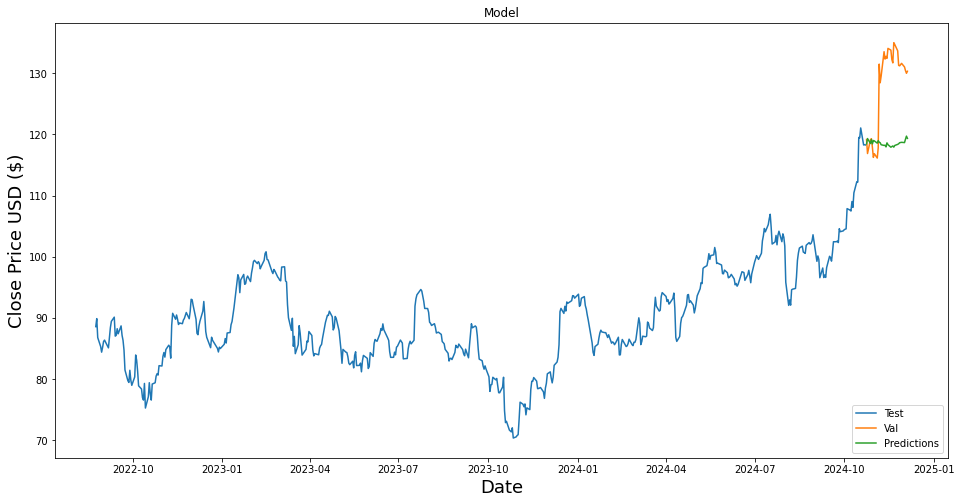

[*********************100%***********************]  1 of 1 completed

MS Directional Accuracy:  0.27586206896551724



C:\Users\adamt\AppData\Local\Temp/ipykernel_19756/109004421.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validate_data['Predictions'] = y_pred


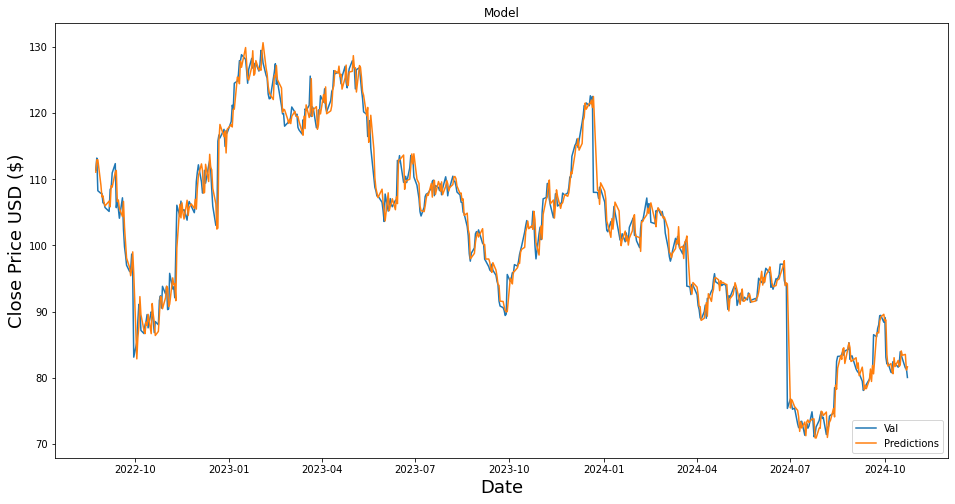

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

NKE Directional Accuracy:  0.5
NKE RMSE:  0.08973630827135029


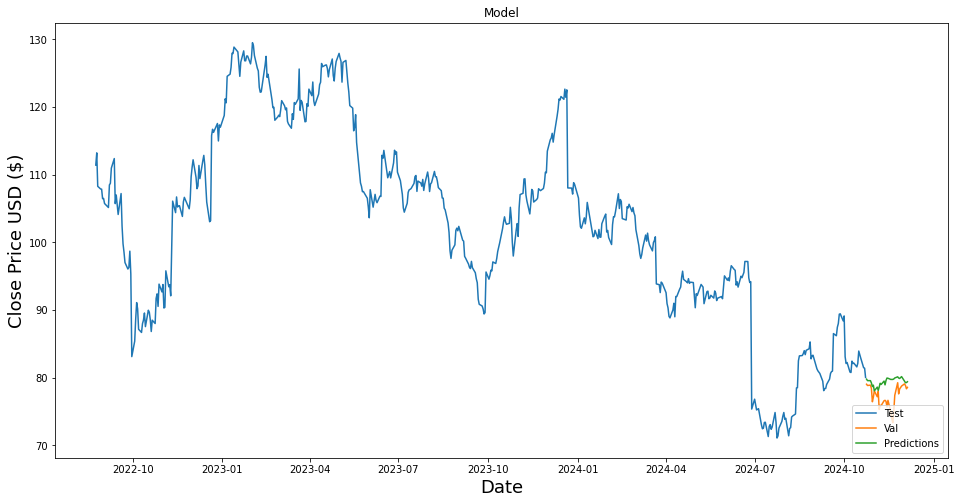

NKE Directional Accuracy:  0.5517241379310345


In [21]:
tickers = ['AAPL', 'MSFT', 'TSLA', 'GOOGL', 'AMZN', 'JPM', 'XOM', 'WFC', 'MS', 'NKE']
accuracy = []
rmse_acc = []

for ticker in tickers:
    start_date = '2014-01-01'
    end_date = '2024-10-24'
    data = get_stock_data(ticker, start_date, end_date)
    data = data['Close']

    percent_train = 0.80
    timesteps = 60

    train_data, test_data = train_test_split(data, percent_train, timesteps)

    scaler = MinMaxScaler(feature_range = (0, 1))
    scaled_train = scaler.fit_transform(train_data)
    scaled_test = scaler.transform(test_data)


    model = LinearRegression()


    X_train, y_train = create_sequences_train(timesteps, scaled_train)
    X_train = X_train.reshape(X_train.shape[0], -1)
    y_train = y_train.reshape(y_train.shape[0], -1)

    model.fit(X_train, y_train)



    X_test = create_sequences_test(timesteps, scaled_test)
    y_test = test_data[timesteps:]

    X_test = X_test.reshape(X_test.shape[0], -1)


    y_pred = model.predict(X_test)
    y_pred = scaler.inverse_transform(y_pred)

    validate_data = test_data[timesteps:]
    validate_data['Predictions'] = y_pred

    plot_data(validate_data, ticker)

    dir_accuracy = directional_accuracy(validate_data, ticker)
    accuracy.append(dir_accuracy)
    print(ticker + " Directional Accuracy: ", dir_accuracy)

    rmse = np.sqrt(np.mean(y_pred - y_test.values)**2)
    rmse_acc.append(rmse)
    print(ticker + " RMSE: ", rmse)

    start_date = '2014-01-01'
    end_date = '2024-10-24'
    data = get_stock_data(ticker, start_date, end_date)
    data = data['Close']

    input_data = data[-timesteps:].values
    input_data = scaler.transform(input_data)
    input_data = input_data.reshape(input_data.shape[0])
    preds = []

    for i in range(30):
        prediction = model.predict([input_data])[0][0]
        preds.append(scaler.inverse_transform([[prediction]])[0][0])
        input_data = np.append(input_data[1:], prediction)

    start_date = '2024-10-24'
    end_date = '2024-12-06'
    data = get_stock_data(ticker, start_date, end_date)
    data = data['Close']

    data['Predictions'] = preds

    plt.figure(figsize = (16, 8))
    plt.title('Model')
    plt.xlabel('Date', fontsize = 18)
    plt.ylabel('Close Price USD ($)', fontsize = 18)
    plt.plot(validate_data[ticker])
    plt.plot(data[[ticker, 'Predictions']])
    plt.legend(['Test', 'Val', 'Predictions'], loc = 'lower right')
    plt.show()

    dir_accuracy = directional_accuracy(data, ticker)
    print(ticker + " Directional Accuracy: ", dir_accuracy)

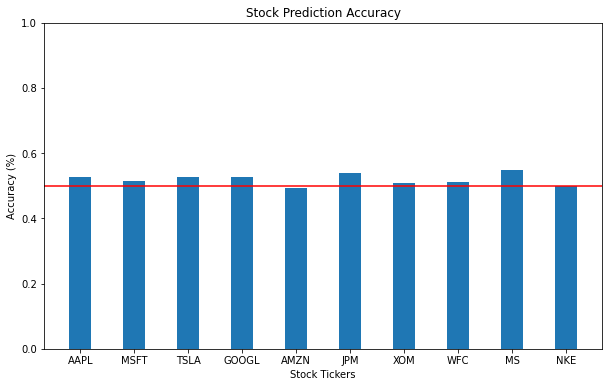

In [22]:
plt.figure(figsize = (10, 6))
plt.bar(tickers, accuracy, width = 0.4)
plt.xlabel('Stock Tickers')
plt.ylabel('Accuracy (%)')
plt.title('Stock Prediction Accuracy')
plt.axhline(y = .50, color = 'red', linestyle = '-')
plt.ylim(0, 1)
plt.show()

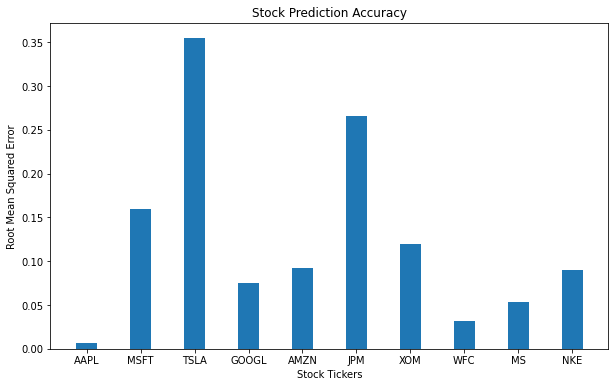

In [25]:
plt.figure(figsize = (10, 6))
plt.bar(tickers, rmse_acc, width = 0.4)
plt.xlabel('Stock Tickers')
plt.ylabel('Root Mean Squared Error')
plt.title('Stock Prediction Accuracy')
plt.show()